## Wine Quality Prediction Using Linear Models 

* Dataset - https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv

* Explanation of the dataset - https://archive.ics.uci.edu/ml/datasets/Wine+Quality

* Target - Wine Quality

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [80]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv', sep =';')

## Data Undertanding

In [15]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
# Initial Dataset Shape
wine_data.shape

(4898, 12)

In [13]:
# Describing Dataset
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [16]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [17]:
# Checking Null Values
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
# Checking Wine Quality Values
wine_data['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

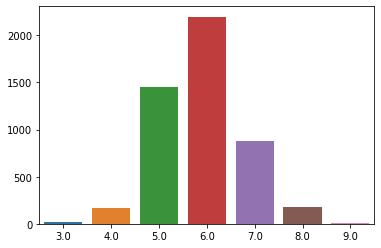

In [82]:
sns.barplot(x=[6.0, 5.0, 7.0, 8.0, 4.0, 3.0, 9.0], y = wine_data.quality.value_counts().values)

No handles with labels found to put in legend.


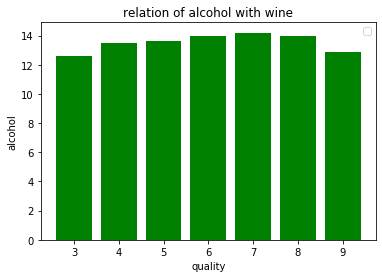

In [83]:
# checking the variation of fixed acidity in the different qualities of wine
plt.bar(wine_data['quality'], wine_data['alcohol'], color = 'green')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

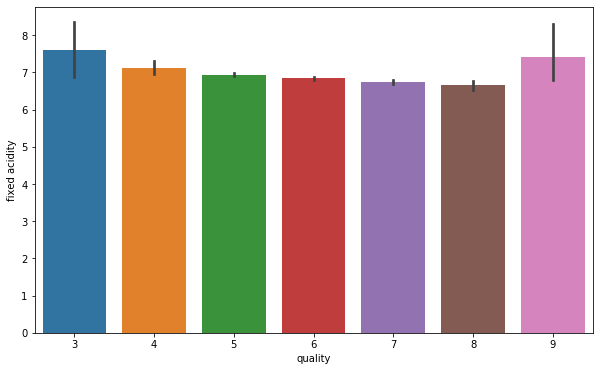

In [84]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine_data)
#fixed acidity has no effect on the quality of wine

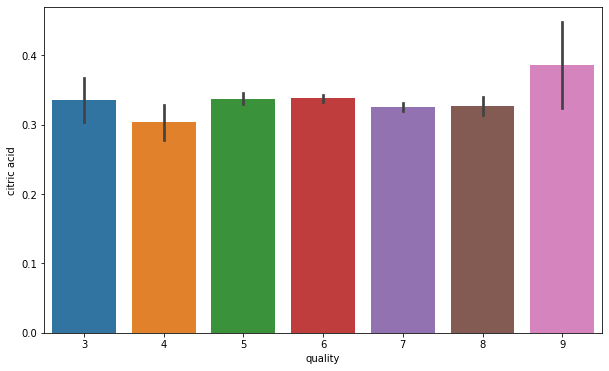

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_data)
#Composition of citric acid go higher as we go higher in the quality of the wine

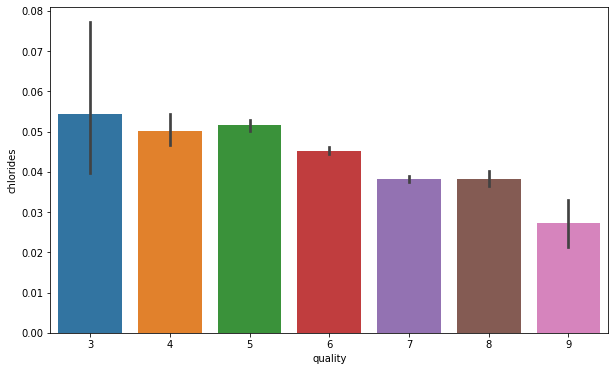

In [32]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_data)
#Composition of chlorides go lower as we go lower in the quality of the wine

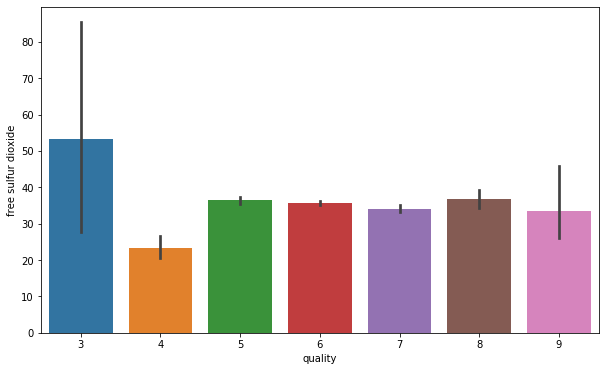

In [33]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_data)
# free Sulphur dioxide has no effect on the quality of the wine

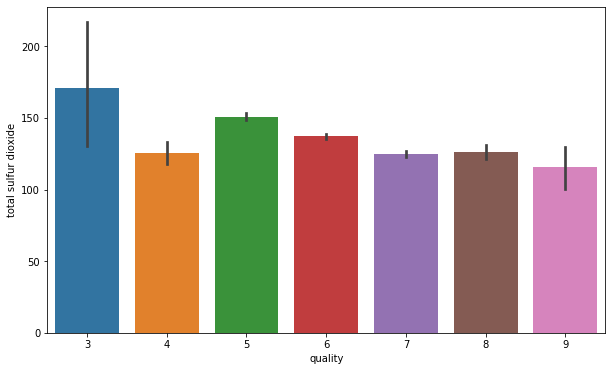

In [86]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_data)
#Composition of total sulfur dioxide go lower as we go lower in the quality of the wine

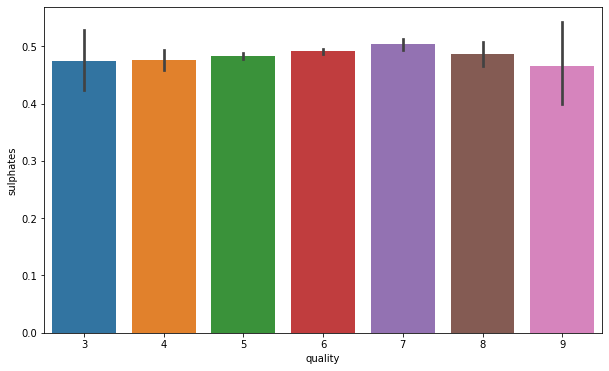

In [35]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_data)
# sulphates has no effect on the Quality of the Wine

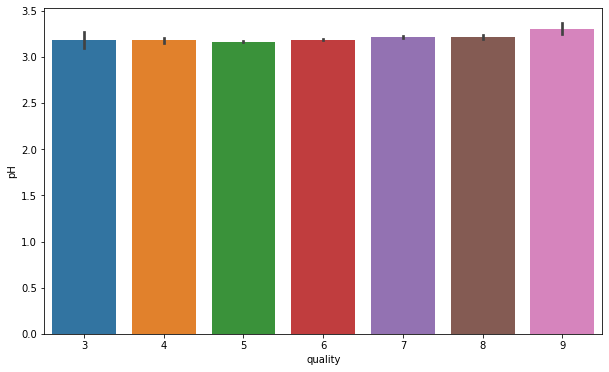

In [43]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine_data)
# pH has no effect on the Quality of the Wine

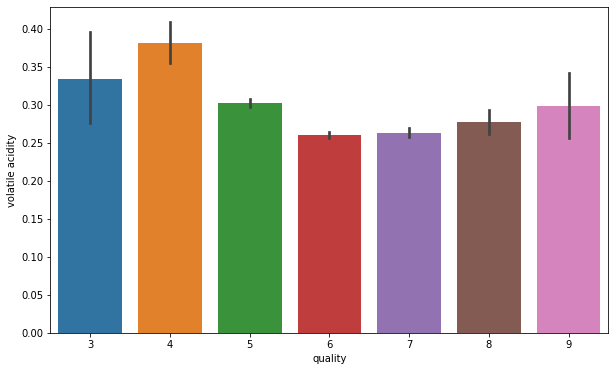

In [47]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_data)
# volatile acidity has no effect on the Quality of the Wine

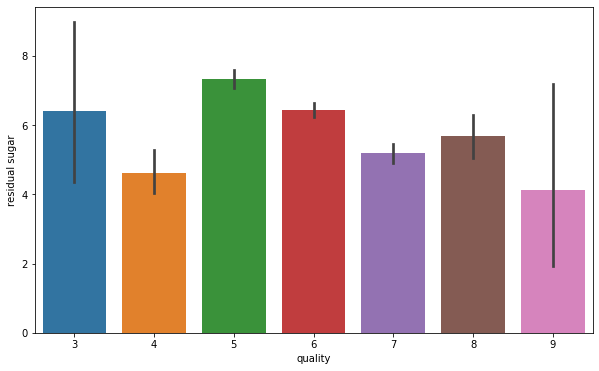

In [85]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine_data)
#Composition of residual sugar go higher as we go lower in the quality of the wine

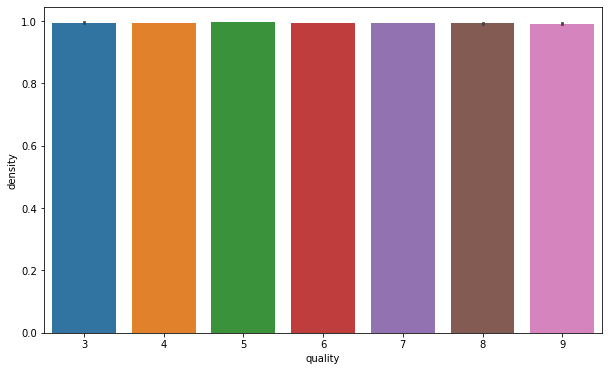

In [48]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine_data)
# density has no effect on the Quality of the Wine

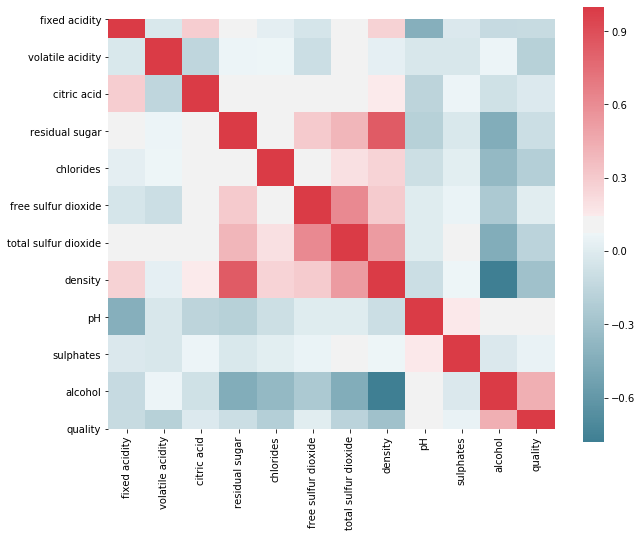

In [36]:
f, ax = plt.subplots(figsize=(10, 8))
corr = wine_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### From the above correlation plot for the given dataset for wine quality prediction, we can easily see which items are related strongly with each other and which items are related weekly with each other. For Example,

* The strongly correlated items are :

1.fixed acidity and citric acid. 
2.free sulphur dioxide and total sulphor dioxide. 
3.fixed acidity and density.
4.alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

* The weekly correlated items are :

1.citric acid and volatile acidity. 
2.fixed acidity and ph. 
3.density and alcohol.

These are some relations which do not depend on each other at all.


### Removing Unnecassary columns from the dataset
* As we saw that volatile acidity, total sulphor dioxide, chlorides, density are very less related to the dependent variable    quality so even if we remove these columns the accuracy won't be affected that much.


* checking the shape of the dataset

In [ ]:
wine_data = wine_data.drop(['volatile acidity', 'sulphate', 'pH', 'density'], axis = 1)

### Seperating Target Data And Feature Data

In [91]:
target = wine_data.quality
feature_data = wine_data.drop(columns=['quality'])

### Train Test Split 

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_data, target, random_state = 3)

### Building linear and Logistic Regression model

* linear Regression

In [114]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [115]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print("Training accuracy :", LR.score(X_train,y_train))

Training accuracy : 0.21303889279481325


In [117]:
print("Testing accuracy :", LR.score(X_test, y_test))

Testing accuracy : 0.23556919578813892


In [120]:
train_pred = LR.predict(X_train)
train_pred

array([5.57250141, 5.55762642, 5.76853773, ..., 6.26989298, 6.52254552,
       5.9223518 ])

In [125]:
test_pred = LR.predict(X_test)
test_pred

array([5.55087219, 5.474502  , 5.78867697, ..., 5.82439261, 5.76509235,
       5.74527652])

In [133]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error (train_pred, y_train) ** 0.5
train_rmse

0.7838207941630495

In [134]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.778896523467526

In [ ]:
# The root-mean-square error (RMSE) is a frequently used measure of the differences between values (sample and population values) predicted by a model and the values actually observed. 
# The RMSE for your training and your test sets should be very similar if you have built a good model. 
# If the RMSE for the test set is much higher than that of the training set, it is likely that you've badly over fit the data

In [135]:
# rounding off the predicted values for test set
predicted_data = np.round_(test_pred)
predicted_data

array([6., 5., 6., ..., 6., 6., 6.])

In [136]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.6079436318902288
Mean Squared Error: 0.6066797942697982
Root Mean Squared Error: 0.778896523467526


* Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

# creating the model
Lr = LogisticRegression()

# feeding the training set into the model
Lr.fit(X_train, y_train)

# predicting the results for the test set
y_pred = Lr.predict(X_test)

# calculating the training and testing accuracies
print("Training accuracy :", Lr.score(X_train, y_train))
print("Testing accuracy :", Lr.score(X_test, y_test))

Training accuracy : 0.49714130138851076
Testing accuracy : 0.5020408163265306


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
